In [1]:
from util import *
import sys
import matplotlib.pyplot as plt
plt.ion()

In [2]:
def InitNN(num_inputs, num_hiddens, num_outputs):
  """Initializes NN parameters."""
  W1 = 0.01 * np.random.randn(num_inputs, num_hiddens)
  W2 = 0.01 * np.random.randn(num_hiddens, num_outputs)
  b1 = np.zeros((num_hiddens, 1))
  b2 = np.zeros((num_outputs, 1))
  return W1, W2, b1, b2


In [3]:
def TrainNN(num_hiddens, eps, momentum, num_epochs):
  """Trains a single hidden layer NN.

  Inputs:
    num_hiddens: NUmber of hidden units.
    eps: Learning rate.
    momentum: Momentum.
    num_epochs: Number of epochs to run training for.

  Returns:
    W1: First layer weights.
    W2: Second layer weights.
    b1: Hidden layer bias.
    b2: Output layer bias.
    train_error: Training error at at epoch.
    valid_error: Validation error at at epoch.
  """

  inputs_train, inputs_valid, inputs_test, target_train, target_valid, target_test = LoadData('./digits.npz')
  W1, W2, b1, b2 = InitNN(inputs_train.shape[0], num_hiddens, target_train.shape[0])
  dW1 = np.zeros(W1.shape)
  dW2 = np.zeros(W2.shape)
  db1 = np.zeros(b1.shape)
  db2 = np.zeros(b2.shape)
  train_error = []
  valid_error = []
  num_train_cases = inputs_train.shape[1]
  for epoch in range(num_epochs):
    # Forward prop
    h_input = np.dot(W1.T, inputs_train) + b1  # Input to hidden layer.
    h_output = 1 / (1 + np.exp(-h_input))  # Output of hidden layer.
    logit = np.dot(W2.T, h_output) + b2  # Input to output layer.
    prediction = 1 / (1 + np.exp(-logit))  # Output prediction.

    # Compute cross entropy
    train_CE = -np.mean(target_train * np.log(prediction) + (1 - target_train) * np.log(1 - prediction))

    # Compute deriv
    dEbydlogit = prediction - target_train

    # Backprop
    dEbydh_output = np.dot(W2, dEbydlogit)
    dEbydh_input = dEbydh_output * h_output * (1 - h_output)

    # Gradients for weights and biases.
    dEbydW2 = np.dot(h_output, dEbydlogit.T)
    dEbydb2 = np.sum(dEbydlogit, axis=1).reshape(-1, 1)
    dEbydW1 = np.dot(inputs_train, dEbydh_input.T)
    dEbydb1 = np.sum(dEbydh_input, axis=1).reshape(-1, 1)

    #%%%% Update the weights at the end of the epoch %%%%%%
    dW1 = momentum * dW1 - (eps / num_train_cases) * dEbydW1
    dW2 = momentum * dW2 - (eps / num_train_cases) * dEbydW2
    db1 = momentum * db1 - (eps / num_train_cases) * dEbydb1
    db2 = momentum * db2 - (eps / num_train_cases) * dEbydb2

    W1 = W1 + dW1
    W2 = W2 + dW2
    b1 = b1 + db1
    b2 = b2 + db2

    valid_CE = Evaluate(inputs_valid, target_valid, W1, W2, b1, b2)

    train_error.append(train_CE)
    valid_error.append(valid_CE)
    #sys.stdout.write('\rStep %d Train CE %.5f Validation CE %.5f' % (epoch, train_CE, valid_CE))
    #sys.stdout.flush()
    #if (epoch % 100 == 0):
    #  sys.stdout.write('\n')
    #sys.stdout.write('\n')
  final_train_error = Evaluate(inputs_train, target_train, W1, W2, b1, b2)
  final_valid_error = Evaluate(inputs_valid, target_valid, W1, W2, b1, b2)
  final_test_error = Evaluate(inputs_test, target_test, W1, W2, b1, b2)
  print ('Error: Train %.5f Validation %.5f Test %.5f' % (final_train_error, final_valid_error, final_test_error))
  return W1, W2, b1, b2, train_error, valid_error

In [4]:
def Evaluate(inputs, target, W1, W2, b1, b2):
  """Evaluates the model on inputs and target."""
  h_input = np.dot(W1.T, inputs) + b1  # Input to hidden layer.
  h_output = 1 / (1 + np.exp(-h_input))  # Output of hidden layer.
  logit = np.dot(W2.T, h_output) + b2  # Input to output layer.
  prediction = 1 / (1 + np.exp(-logit))  # Output prediction.
  CE = -np.mean(target * np.log(prediction) + (1 - target) * np.log(1 - prediction))
  return CE

In [5]:
def DisplayErrorPlot(train_error, valid_error, title):
  plt.figure(1)
  plt.clf()
  plt.plot(range(len(train_error)), train_error, 'b', label='Train')
  plt.plot(range(len(valid_error)), valid_error, 'g', label='Validation')
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel('Cross entropy')
  plt.legend()
  plt.show()
  #str(input('Press Enter to exit.'))

In [6]:
def SaveModel(modelfile, W1, W2, b1, b2, train_error, valid_error):
  """Saves the model to a numpy file."""
  model = {'W1': W1, 'W2' : W2, 'b1' : b1, 'b2' : b2,
           'train_error' : train_error, 'valid_error' : valid_error}
  print('Writing model to %s' % modelfile)
  np.savez(modelfile, **model)

In [7]:
def LoadModel(modelfile):
  """Loads model from numpy file."""
  model = np.load(modelfile)
  return model['W1'], model['W2'], model['b1'], model['b2'], model['train_error'], model['valid_error']

In [8]:
def basic() :
  num_hiddens = 10
  eps = 0.1
  momentum = 0.0
  num_epochs = 1000
  for i in range(5) :
    W1, W2, b1, b2, train_error, valid_error = TrainNN(num_hiddens, eps, momentum, num_epochs)
    DisplayErrorPlot(train_error, valid_error, "Basic "   ) 

Error: Train 0.04360 Validation 0.06111 Test 0.07129


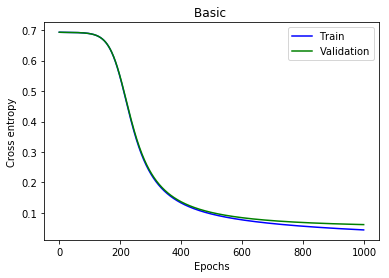

Error: Train 0.04393 Validation 0.06228 Test 0.07239


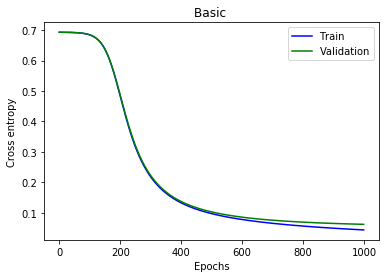

Error: Train 0.04362 Validation 0.06150 Test 0.07192


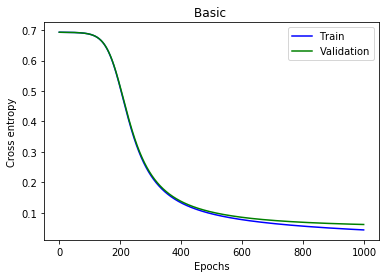

Error: Train 0.04509 Validation 0.06232 Test 0.07240


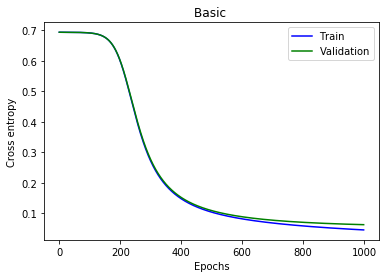

Error: Train 0.04493 Validation 0.06289 Test 0.07282


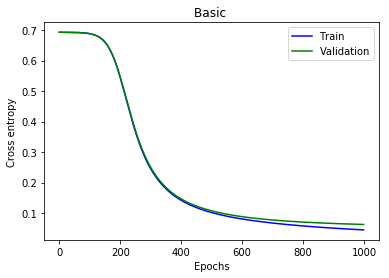

In [12]:
basic()

# 1번
5번 기본 코드를 가지고 돌려보았는데
Error 는 Train Set은 0.043에 근접하게 수렴하는 모습을 보였고
Validation은 0.06에 수렴
Test 0.07정도에 수렴했다.

In [10]:
def main():
  num_hiddens = 10
  eps = 0.1
  momentum = 0.0
  epoch = [10,100,500,1000,2000]
  for i in epoch :
    num_epochs = i
    W1, W2, b1, b2, train_error, valid_error = TrainNN(num_hiddens, eps, momentum, num_epochs)
    DisplayErrorPlot(train_error, valid_error, "Epoch is " + str(num_epochs) ) 
  # If you wish to save the model for future use :
  # outputfile = 'model.npz'
  # SaveModel(outputfile, W1, W2, b1, b2, train_error, valid_error)

Error: Train 0.69313 Validation 0.69312 Test 0.69312


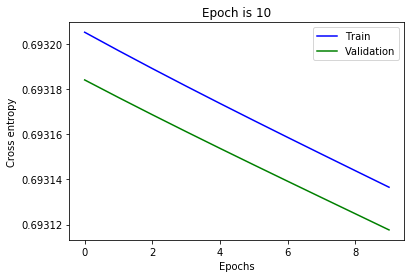

Error: Train 0.68880 Validation 0.68901 Test 0.68882


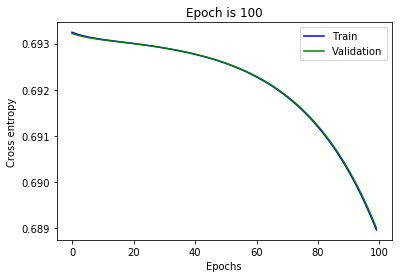

Error: Train 0.09794 Validation 0.10418 Test 0.10613


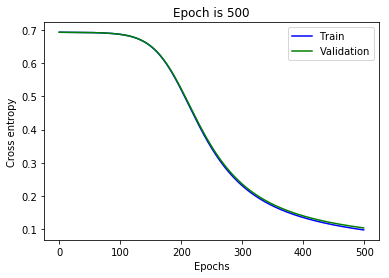

Error: Train 0.04522 Validation 0.06261 Test 0.07279


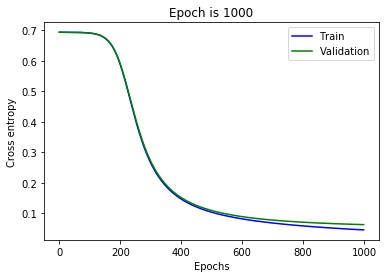

Error: Train 0.01885 Validation 0.05291 Test 0.06727


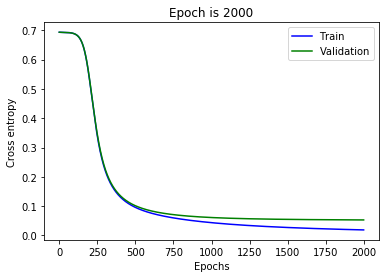

In [11]:
main()

In [36]:
def epsilon():
  num_hiddens = 10
  num_epochs = 1000
  momentum = 0.0
  epss = [0.01, 0.2,0.3,0.4,0.5]
  for i in epss :
    eps = i
    W1, W2, b1, b2, train_error, valid_error = TrainNN(num_hiddens, eps, momentum, num_epochs)
    DisplayErrorPlot(train_error, valid_error, "Learning rate is " + str(eps)) 
  # If you wish to save the model for future use :
  # outputfile = 'model.npz'
  # SaveModel(outputfile, W1, W2, b1, b2, train_error, valid_error)

Error: Train 0.68552 Validation 0.68598 Test 0.68560


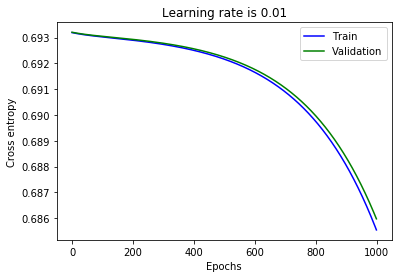

Error: Train 0.01869 Validation 0.05302 Test 0.06737


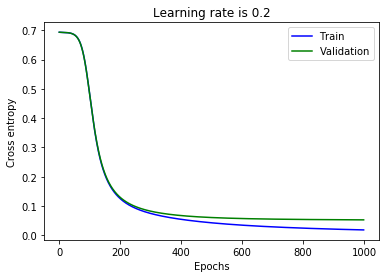

Error: Train 0.01086 Validation 0.05204 Test 0.06816


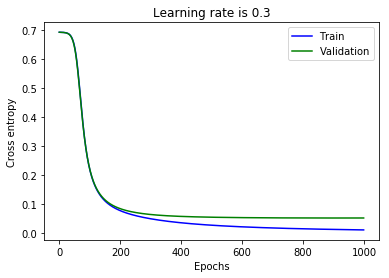

Error: Train 0.00730 Validation 0.05374 Test 0.07035


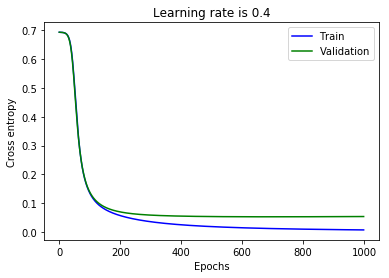

Error: Train 0.00548 Validation 0.05417 Test 0.07191


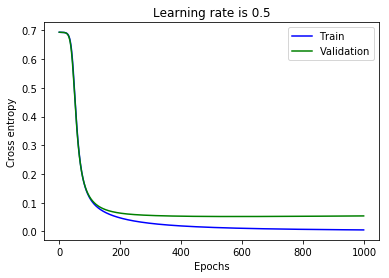

In [37]:
epsilon()

# 3. Learning Rate

Learning rate를 0.01, 0.2, 0.3, 0.4, 0.5로 실험을 진행했다.
0.01일 경우 0.69~ 0.68 정도에 수렴했고 아무래도 조금씩 움직이기 때문에 그래프의 움직임이 다른것과는 모습이 달랐다.
0.2는 0.3, 0.4, 0.5 는 비슷하게 보인다.


In [30]:
def momentum():
  num_hiddens = 10
  eps = 0.1
  num_epochs = 1000
  momentums = [0.0,0.5,0.9]
  for i in momentums :
    momentum = i
    W1, W2, b1, b2, train_error, valid_error = TrainNN(num_hiddens, eps, momentum, num_epochs)
    DisplayErrorPlot(train_error, valid_error, "Momentum is " + str(momentum)) 
  # If you wish to save the model for future use :
  # outputfile = 'model.npz'
  # SaveModel(outputfile, W1, W2, b1, b2, train_error, valid_error)

Error: Train 0.04341 Validation 0.06133 Test 0.07179


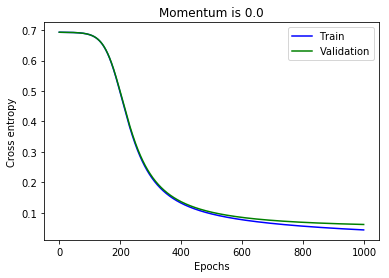

Error: Train 0.01914 Validation 0.05279 Test 0.06775


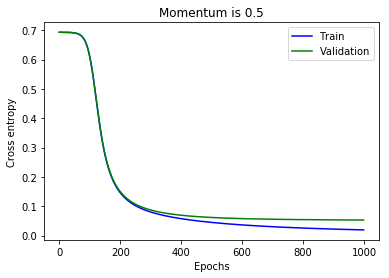

Error: Train 0.00209 Validation 0.06091 Test 0.08362


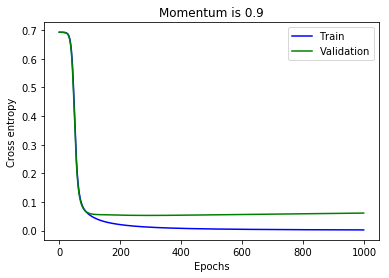

In [31]:
momentum()

# 모멘텀 
모멘텀을 0.0 0.5 0.9 으로 바꿔가면서 실행했다.
모멘텀이 커질수록 빨리 값에 수렴하는 경향을 보인다.
내 생각에는 0.5가 제일 적당하다고 생각한다.



In [38]:
def hiddenunit():
  num_hiddens = [2,5, 30, 100] 
  num_epochs = 1000
  eps = 0.02
  momentum = 0.5
  for num_hidden in num_hiddens :
    W1, W2, b1, b2, train_error, valid_error = TrainNN(num_hidden, eps, momentum, num_epochs)
    DisplayErrorPlot(train_error, valid_error, "Amount of hidden units is : " + str(num_hidden))

  # If you wish to save the model for future use :
  # outputfile = 'model.npz'
  # SaveModel(outputfile, W1, W2, b1, b2, train_error, valid_error)

Error: Train 0.26818 Validation 0.27354 Test 0.27111


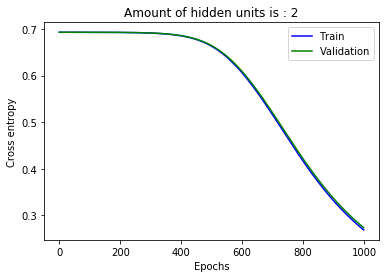

Error: Train 0.16526 Validation 0.17006 Test 0.16944


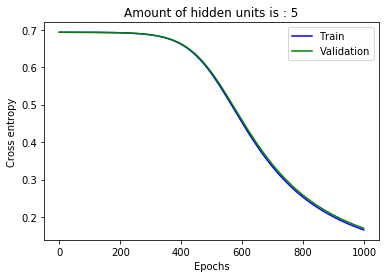

Error: Train 0.10374 Validation 0.10850 Test 0.10950


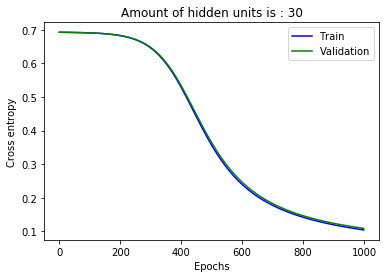

Error: Train 0.09315 Validation 0.09808 Test 0.09935


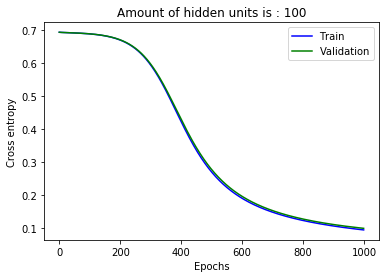

In [39]:
hiddenunit()

# 4 Hidden Unit
Epsilon을 0.02, 모멘텀 0.5, 
Hidden Unit을 2, 5, 30, 100 으로 진행했다.
Hidden Unit이 늘어날수록 시간이 오래걸리지만 Epoch가 적어도 수렴 빨리하는 모습을 보여준다.

